# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [18]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [19]:
raw_data = pd.read_csv("Bank-data.csv")
raw_data = raw_data.drop(["Unnamed: 0"], axis=1)
raw_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [20]:
data = raw_data.copy()
data["y"] = data["y"].map({"no":0,"yes":1})

In [21]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [22]:
y = data["y"]
x1 = data["duration"]

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [23]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


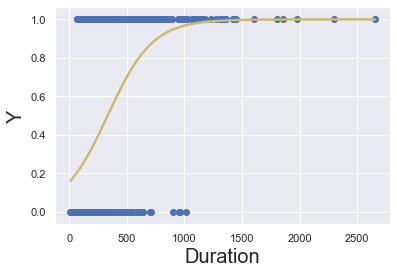

In [24]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results.params[0],results.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color="C0")
plt.plot(x_sorted,f_sorted,lw=2.5,c="C8")
plt.xlabel("Duration",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [25]:
y = data["y"]
x1 = data[["interest_rate","credit","march","previous","duration"]]

In [26]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [27]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [28]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [29]:
confusion_matrix(x,y,results)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [30]:
test_data = pd.read_csv("Bank-data-testing.csv")

In [31]:
test_data["y"] = test_data["y"].map({"yes":1,"no":0}) 
test_data = test_data.drop(["Unnamed: 0"],axis = 1)
test_data = test_data.drop(["may"],axis = 1)
test_data.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [32]:
test_actual = test_data["y"]
test_data = test_data.drop(["y"],axis=1)
test_data = sm.add_constant(test_data)
test_data.head()

,const,interest_rate,credit,march,previous,duration
0,1.0,1.313,0.0,1.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,0.0,1.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0


In [33]:
x.head()

,const,interest_rate,credit,march,previous,duration
0,1.0,1.334,0.0,1.0,0.0,117.0
1,1.0,0.767,0.0,0.0,1.0,274.0
2,1.0,4.858,0.0,1.0,0.0,167.0
3,1.0,4.120,0.0,0.0,0.0,686.0
4,1.0,4.856,0.0,1.0,0.0,157.0


Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [34]:
cm = confusion_matrix(test_data,test_actual,results)
cm

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)